# Project 3


Your project should be submitted (as a Jupyter Notebook via GitHub) by end of the due date. The group should present their code and findings in our meetup. The ability to be an effective member of a virtual team is highly valued in the data science job market.

Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can.

Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set.

How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect? Source: Natural Language Processing with Python, exercise 6.10.2.


Group (The DataDriven Team): Susanna Wong, Puja Roy, Mikhail Broomes & Marjete Vucinaj

In [ ]:
!pip install syllapy


In [ ]:
import nltk
from nltk.corpus import names

import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
import syllapy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import plot_tree



# Load Corpus

There are two files in the corpus:


1.   'female.txt': It contains 5001 females names.
2.   'male.txt': It contains 2943 male names.



In [ ]:
nltk.download('names')
names.fileids()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


['female.txt', 'male.txt']

## Male Names

In [ ]:
# From text p 62
names = nltk.corpus.names

male_names = names.words('male.txt')
print(male_names[:10])
len(male_names)

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim']


2943

## Female Names

In [ ]:
female_names = names.words('female.txt')
print(female_names[:10])
len(female_names)

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


5001

## Gender Neutral Names

Just observing the first couple names of each list, we can see some names appear in both genders. There are 365 gender neutral names.

In [ ]:
neutral_names = [w for w in male_names if w in female_names]
print(neutral_names[:10])
len(neutral_names)

['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie']


365

## Characteristics of Gender Names

## Last Letter of Name

Names ending with 'a','e', or 'i' are mostly female names.

Names ending with 'h', or 'l' are gender neutral (equally likely).

Names ending with 'k', 'o', 'r', 's', or 't' are mostly male names.

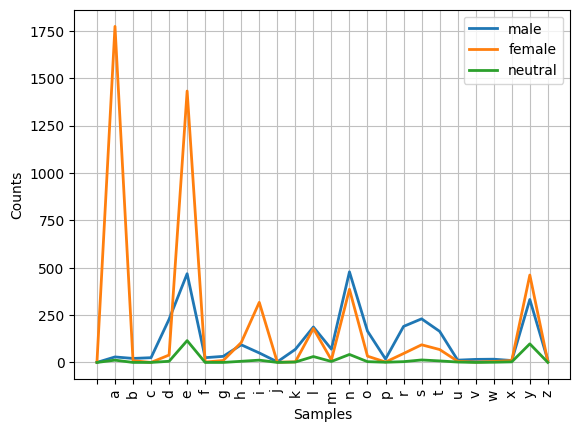

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (category, name[-1])
    for category in ['male','female','neutral']
    for name in (male_names if category == 'male' else (female_names if category == 'female' else neutral_names))
)

cfd.plot()

## First Letter of Name

Names starting with 'a','e', or 'i' are mostly female names.

Names starting with 'h', or 'l' are gender neutral (equally likely).

Names starting with 'k', 'o', 'r', 's', or 't' are mostly male names.

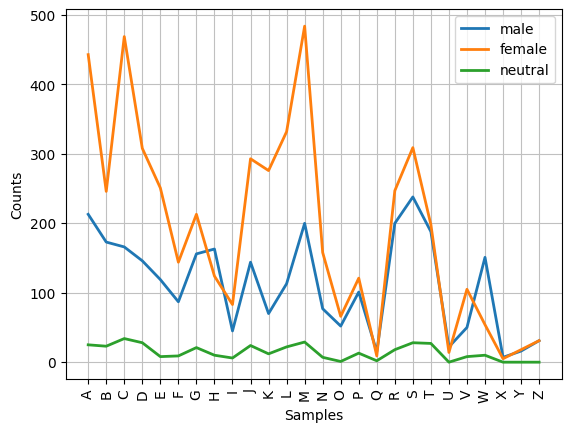

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (category, name[0])
    for category in ['male','female','neutral']
    for name in (male_names if category == 'male' else (female_names if category == 'female' else neutral_names))
)

cfd.plot()

## Length

Label names with gender, create a dataframe and add name length

In [ ]:
# Adding gender labels to each name
labeled_names = ([(name, 'male') for name in male_names] +
                 [(name, 'female') for name in female_names])

all_names = pd.DataFrame(labeled_names, columns =['name','gender'])
all_names['length']=all_names['name'].str.len()
#all_names

Group the names by gender and length. and count how many names fall into each group. Create a bar plot using Seaborn  where the x-axis shows the length of the names. The y-axis shows the count of names.

Using different colors represent gendered names, the visual shows that females tend to have names with longer length and male names with highest count has 6 letters.



<Axes: xlabel='length', ylabel='count'>

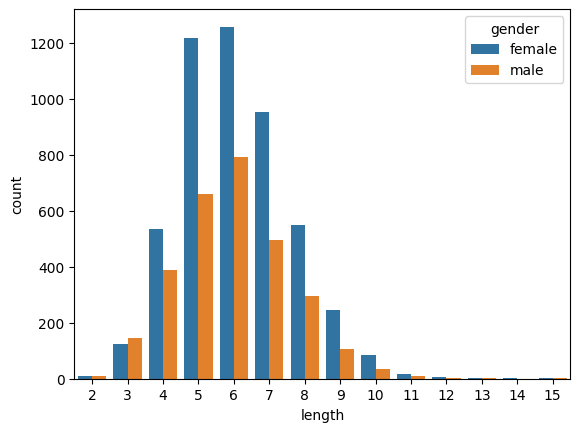

In [ ]:
length_counts = all_names.groupby(['gender','length']).size().reset_index(name = 'count')

sns.barplot(x='length', y='count', hue = 'gender', data = length_counts)

# Data Preprocessing


Mix the names randomly (using random.shuffle) to ensure male and female names are not in any specific order. Print the first 10 names from the shuffled list to give an example of the shuffled order.

In [ ]:
# Shuffle the labeled names to mix male and female names
random.seed(115)
random.shuffle(labeled_names)

# Print the first 10 labeled names as a sample
print("Labeled Names:", labeled_names[:10])

Labeled Names: [('Janene', 'female'), ('Hedda', 'female'), ('Mignon', 'female'), ('Kalil', 'male'), ('Becky', 'female'), ('Dinah', 'female'), ('Belinda', 'female'), ('Toma', 'female'), ('Storey', 'female'), ('Osborne', 'male')]


# Gender Feature
The accuracy rate of all the models below changes every time the code is run even though step for setting seed was completed.

## Model 1

Our first model looks at the last letter of each name. It has an accuracy rate of 76.8%. Resetting the seed before each shuffle was skipped for this model since that code was completed in preprocessing step.

In [ ]:
def gender_features1(word):
  return {'last_letter':word[-1]}

Prepare the data by splitting into into training(remaining 6900), development/test(500), and test sets (500). Extract features (using the function above)  from each name (n) and pair with the corresponding gender ('g') to create feature sets. Train Naive Bayes classifier using the training set. Evaluate the accuracy of the classifier using the development/test set and print.

In [ ]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

train_set = [(gender_features1(n), g) for (n,g) in train_names]
devtest_set = [(gender_features1(n), g) for (n,g) in devtest_names]
test_set = [(gender_features1(n), g) for (n,g) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.751


Below shows the top 10 most important features in our classifier.

In [ ]:
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'k'              male : female =     38.3 : 1.0
             last_letter = 'a'            female : male   =     32.5 : 1.0
             last_letter = 'f'              male : female =     14.3 : 1.0
             last_letter = 'p'              male : female =     11.0 : 1.0
             last_letter = 'm'              male : female =     10.3 : 1.0
             last_letter = 'd'              male : female =      9.8 : 1.0
             last_letter = 'v'              male : female =      9.7 : 1.0
             last_letter = 'o'              male : female =      9.3 : 1.0
             last_letter = 'r'              male : female =      6.8 : 1.0
             last_letter = 'g'              male : female =      5.9 : 1.0


Identify errors made by a classifier on the development/testing dataset to identify patterns and make improvements in feature extraction.




In [ ]:
errors = []
for (name, tag) in devtest_names:
  guess = classifier.classify(gender_features1(name))
  if guess != tag:
    errors.append( (tag, guess, name) )

In [ ]:
for (tag, guess, name) in sorted(errors[:5]):
  print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Katlin                        
correct=male     guess=female   name=Lonnie                        
correct=male     guess=female   name=Rodolphe                      
correct=male     guess=female   name=Tate                          
correct=male     guess=female   name=Wolfie                        


## Model 2


Our second model looks at the last two letters of each name.

In [ ]:
def gender_features2(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:]}

Prepare the data by splitting into into training, development/test, and test sets. Extract features (using the function above)  from each name (n) and pair with the corresponding gender ('g') to create feature sets. Train Naive Bayes classifier using the training set. Evaluate the accuracy of the classifier using the development/test set and print.

In [ ]:
random.seed(106)
random.shuffle(labeled_names)

train_names2 = labeled_names[1500:]
devtest_names2 = labeled_names[500:1500]
test_names2 = labeled_names[:500]

train_set2 = [(gender_features2(n), g) for (n,g) in train_names2]
devtest_set2 = [(gender_features2(n), g) for (n,g) in devtest_names2]
classifier = nltk.NaiveBayesClassifier.train(train_set2)
print(nltk.classify.accuracy(classifier, devtest_set2))

0.766


In [ ]:
classifier.show_most_informative_features(10)

Most Informative Features
                 suffix2 = 'na'           female : male   =    141.4 : 1.0
                 suffix2 = 'la'           female : male   =     64.8 : 1.0
                 suffix2 = 'ta'           female : male   =     64.8 : 1.0
                 suffix1 = 'a'            female : male   =     40.7 : 1.0
                 suffix2 = 'ia'           female : male   =     33.8 : 1.0
                 suffix2 = 'sa'           female : male   =     30.7 : 1.0
                 suffix2 = 'ra'           female : male   =     30.0 : 1.0
                 suffix2 = 'ld'             male : female =     29.4 : 1.0
                 suffix2 = 'rt'             male : female =     28.3 : 1.0
                 suffix1 = 'k'              male : female =     26.9 : 1.0


Identify errors made by a classifier on the development/testing dataset to identify patterns and make improvements in feature extraction. Adding more letters seems to improve the accuracy.


In [ ]:
errors = []
for (name, tag) in devtest_names:
  guess = classifier.classify(gender_features2(name))
  if guess != tag:
    errors.append( (tag, guess, name) )
for (tag, guess, name) in sorted(errors[:5]):
  print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Katlin                        
correct=male     guess=female   name=Lonnie                        
correct=male     guess=female   name=Rodolphe                      
correct=male     guess=female   name=Tate                          
correct=male     guess=female   name=Wolfie                        


## Model 3

Our third model looks at the last two letters and first two letters of each name.


In [ ]:
def gender_features3(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'prefix1':word[:1],
          'prefix2':word[:2],}

Prepare the data by splitting into into training, development/test, and test sets. Extract features (using the function above)  from each name (n) and pair with the corresponding gender ('g') to create feature sets. Train Naive Bayes classifier using the training set. Evaluate the accuracy of the classifier using the development/test set and print.

In [ ]:
random.seed(107)
random.shuffle(labeled_names)

train_names3 = labeled_names[1500:]
devtest_names3 = labeled_names[500:1500]
test_names3 = labeled_names[:500]

train_set3 = [(gender_features3(n), g) for (n,g) in train_names3]
devtest_set3 = [(gender_features3(n), g) for (n,g) in devtest_names3]
classifier = nltk.NaiveBayesClassifier.train(train_set3)
print(nltk.classify.accuracy(classifier, devtest_set3))

0.801


## Model 4

Our fourth model looks at the last three letters and first two letters of each name.


In [ ]:
def gender_features4(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2]}

Prepare the data by splitting into into training, development/test, and test sets. Extract features (using the function above)  from each name (n) and pair with the corresponding gender ('g') to create feature sets. Train Naive Bayes classifier using the training set. Evaluate the accuracy of the classifier using the development/test set and print.

In [ ]:
random.seed(108)
random.shuffle(labeled_names)

train_names4 = labeled_names[1500:]
devtest_names4 = labeled_names[500:1500]
test_names4 = labeled_names[:500]

train_set4 = [(gender_features4(n), g) for (n,g) in train_names4]
devtest_set4 = [(gender_features4(n), g) for (n,g) in devtest_names4]
classifier = nltk.NaiveBayesClassifier.train(train_set4)
print(nltk.classify.accuracy(classifier, devtest_set4))

0.801


## Model 5

Our fifth model looks at the last three letters and first three letters of each name.


In [ ]:
def gender_features5(word):
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2],
          'prefix3':word[:3]}

Prepare the data by splitting into into training, development/test(500), and test sets (500). Extract features (using the function above)  from each name (n) and pair with the corresponding gender ('g') to create feature sets. Train Naive Bayes classifier using the training set. Evaluate the accuracy of the classifier using the development/test set and print.

In [ ]:
random.seed(108)
random.shuffle(labeled_names)

train_names5 = labeled_names[1500:]
devtest_names5 = labeled_names[500:1500]
test_names5 = labeled_names[:500]

train_set5 = [(gender_features5(n), g) for (n,g) in train_names5]
devtest_set5 = [(gender_features5(n), g) for (n,g) in devtest_names5]
classifier = nltk.NaiveBayesClassifier.train(train_set5)
print(nltk.classify.accuracy(classifier, devtest_set5))

0.836


Identify errors made by a classifier on the development/testing dataset to identify patterns and make improvements in feature extraction. To potentially improve the model, add a different feature.



In [ ]:
errors = []
for (name, tag) in devtest_names5:
  guess = classifier.classify(gender_features5(name))
  if guess != tag:
    errors.append( (tag, guess, name) )
for (tag, guess, name) in sorted(errors[:5]):
  print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Brook                         
correct=female   guess=male     name=Judy                          
correct=female   guess=male     name=Pen                           
correct=male     guess=female   name=Juanita                       
correct=male     guess=female   name=Keene                         


## Model 6


Our sixth model looks at the last three letters and first three letters of each name and adds feature length.

In [ ]:
def gender_features6(word):
  length = len(word)
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2],
          'prefix3':word[:3],
          'length':length}

Prepare the data by splitting into into training, development/test, and test sets. Extract features (using the function above)  from each name (n) and pair with the corresponding gender ('g') to create feature sets. Train Naive Bayes classifier using the training set. Evaluate the accuracy of the classifier using the development/test set and print.

In [ ]:
random.seed(109)
random.shuffle(labeled_names)

train_names6 = labeled_names[1500:]
devtest_names6 = labeled_names[500:1500]
test_names6 = labeled_names[:500]

train_set6 = [(gender_features6(n), g) for (n,g) in train_names6]
devtest_set6 = [(gender_features6(n), g) for (n,g) in devtest_names6]
classifier = nltk.NaiveBayesClassifier.train(train_set6)
print(nltk.classify.accuracy(classifier, devtest_set6))

0.822


## Model 7

The seventh model looks at the same features of model 6 (last three and first three letters of each name and length) and adds feature where the last letter is a vowel. (? or s?)


In [ ]:
def gender_features7(word):
  length = len(word)
  return {'suffix1':word[-1:],
          'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix1':word[:1],
          'prefix2':word[:2],
          'prefix3':word[:3],
          'last_is_vowel':(word[-1] in 'aeious')}

Prepare the data by splitting into into training, development/test, and test sets. Extract features (using the function above)  from each name (n) and pair with the corresponding gender ('g') to create feature sets. Train Naive Bayes classifier using the training set. Evaluate the accuracy of the classifier using the development/test set and print.

In [ ]:
random.seed(110)
random.shuffle(labeled_names)

train_names7 = labeled_names[1500:]
devtest_names7 = labeled_names[500:1500]
test_names7 = labeled_names[:500]

train_set7 = [(gender_features7(n), g) for (n,g) in train_names7]
devtest_set7 = [(gender_features7(n), g) for (n,g) in devtest_names7]
classifier = nltk.NaiveBayesClassifier.train(train_set7)
print(nltk.classify.accuracy(classifier, devtest_set7))

0.851


After creating models 1-7, we determined that the accuracy rate of all the models change every time the code is run, whihc made identifying the best mode difficult. Therefore, we used cross-validation technique to assess how well the models perform. Kfold test (explained later in notebook) indicated that model 6 was the best; however, we wanted see if we could improve the model by adding a new feature and removing the first and last letter and length, to create model 8.

# Model 8

Model eight looks at the second and third letter of the start and end of the name and syllables of the names (and ensured syllapy was installed and loaded and function to count them).


Prepare the data by splitting into into training, development/test, and test sets. Extract features (using the function above)  from each name (n) and pair with the corresponding gender ('g') to create feature sets. Train Naive Bayes classifier using the training set. Evaluate the accuracy of the classifier using the development/test set and print.

In [ ]:
def count_syllables(word):
    return syllapy.count(word)

def gender_features8(word):
    length = len(word)
    syllables = count_syllables(word)

    return {'suffix2':word[-2:],
          'suffix3':word[-3:],
          'prefix2':word[:2],
          'prefix3':word[:3],
          'syllables': syllables}
random.seed(109)
random.shuffle(labeled_names)

train_names8 = labeled_names[1500:]
devtest_names8 = labeled_names[500:1500]
test_names8 = labeled_names[:500]

train_set8 = [(gender_features8(n), g) for (n,g) in train_names8]
devtest_set8 = [(gender_features8(n), g) for (n,g) in devtest_names8]
classifier = nltk.NaiveBayesClassifier.train(train_set8)
print(nltk.classify.accuracy(classifier, devtest_set8))
classifier.show_most_informative_features(10)

0.819
Most Informative Features
                 suffix2 = 'na'           female : male   =     85.0 : 1.0
                 suffix2 = 'la'           female : male   =     65.5 : 1.0
                 suffix2 = 'ia'           female : male   =     49.5 : 1.0
                 suffix2 = 'us'             male : female =     35.4 : 1.0
                 suffix2 = 'ra'           female : male   =     32.0 : 1.0
                 suffix2 = 'sa'           female : male   =     30.0 : 1.0
                 suffix2 = 'rd'             male : female =     29.5 : 1.0
                 suffix3 = 'nne'          female : male   =     29.3 : 1.0
                 suffix3 = 'tta'          female : male   =     24.5 : 1.0
                 suffix2 = 'ta'           female : male   =     22.6 : 1.0


# Kfold

Cross-validation technique to assess how well the models perform in comparision to one another.

The code evaluates the performance of multiple feature extraction methods in each model by creating dictionary of model and corresponding feature extraction. It iterates through each model to obtain the average accuracy of each.

This technique conlcluded that model 8 has the highest accuracy.



In [ ]:
def k_fold_cross_validation(features_func, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=43)
    accuracies = []

#Convert labeled_names to numpy array since only integer scalar arrays can be converted to a scalar index
    labeled_names_array = np.array(labeled_names)

    for train_index, devtest_index in kf.split(labeled_names_array):
        train_names = labeled_names_array[train_index]
        devtest_names = labeled_names_array[devtest_index]

        train_set = [(features_func(n), g) for (n, g) in train_names]
        devtest_set = [(features_func(n), g) for (n, g) in devtest_names]

        classifier = nltk.NaiveBayesClassifier.train(train_set)
        accuracy = nltk.classify.accuracy(classifier, devtest_set)
        accuracies.append(accuracy)

    avg_accuracy = sum(accuracies) / len(accuracies)
    return avg_accuracy

# Runs k-fold cross-validation for each model
models = {
    'Model 1': gender_features1,
    'Model 2': gender_features2,
    'Model 3': gender_features3,
    'Model 4': gender_features4,
    'Model 5': gender_features5,
    'Model 6': gender_features6,
    'Model 7': gender_features7,
    'Model 8': gender_features8,
}

for model_name, features_func in models.items():
    avg_accuracy = k_fold_cross_validation(features_func)
    print(f"Average accuracy for {model_name}: {avg_accuracy:.4f}")

Average accuracy for Model 1: 0.7594
Average accuracy for Model 2: 0.7766
Average accuracy for Model 3: 0.8029
Average accuracy for Model 4: 0.8143
Average accuracy for Model 5: 0.8357
Average accuracy for Model 6: 0.8353
Average accuracy for Model 7: 0.8286
Average accuracy for Model 8: 0.8370


# Goodness of fit

Since many of the model were increaseing in accurace we wanted to make sure that the model we select as the 'final' model 8 wasnt capturing noise; therefore we plot the learning curves for the training and dev-test groups.

The code experiments with different training set sizes, to determine the optimal amount of data required to achieve the best accuracy or model performance without overfitting.

From the visual analysis, the gap between training and dev-test accuracies does not indicate overfitting. The decrease in training accuracy with increased data exposure suggests the model is encountering more diverse patterns. Additionally, the rising dev-test accuracy with increased training size indicates improved performance on unseen data.



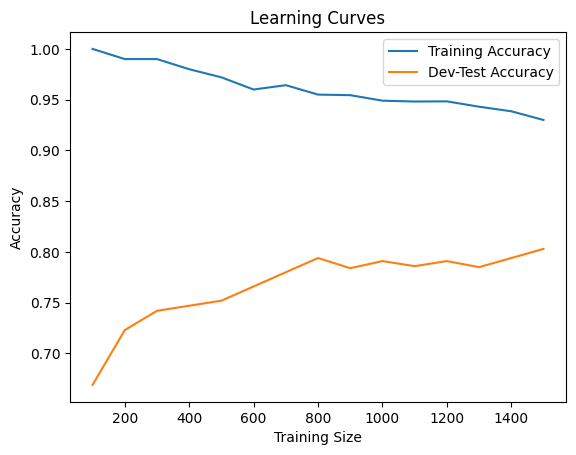

In [ ]:
train_set8 = [(gender_features8(n), g) for (n, g) in train_names8]
devtest_set8 = [(gender_features8(n), g) for (n, g) in devtest_names8]
test_set8 = [(gender_features8(n), g) for (n, g) in test_names8]

# Add more training set sizes
train_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]
train_accuracies = []
devtest_accuracies = []

for size in train_sizes:
    train_acc, devtest_acc = train_and_evaluate(train_set8[:size], devtest_set8)
    train_accuracies.append(train_acc)
    devtest_accuracies.append(devtest_acc)

# Plot the learning curves
plot_learning_curves(train_sizes, train_accuracies, devtest_accuracies)

# Final Model

The final model select is model 8.

To form the conclusions for this project a Decison Tree was created to highlightsimportant features evalulate model performance metrics such as precision, accuracy, recall and f1-score.

Code uses vectorization to transforms dictionaries of feature names to feature values so the format is numeric, then trains a classifier, evaluates its performance (based on model 8), and prints the results.


In [ ]:
# Vectorize features since they must be in string or real number
vectorizer = DictVectorizer(sparse=False)
train_features = vectorizer.fit_transform([features for features, label in train_set8])
train_labels = [label for features, label in train_set8]

# Train Decision Tree Classifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(train_features, train_labels)

# Evaluate on Dev-Test Set
devtest_features = vectorizer.transform([features for features, label in devtest_set8])
devtest_labels = [label for features, label in devtest_set8]

devtest_predictions = classifier_dt.predict(devtest_features)
devtest_accuracy = accuracy_score(devtest_labels, devtest_predictions)
devtest_report = classification_report(devtest_labels, devtest_predictions, target_names=['female', 'male'])

# Evaluate on Test Set
test_features = vectorizer.transform([features for features, label in test_set8])
test_labels = [label for features, label in test_set8]

test_predictions = classifier_dt.predict(test_features)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_report = classification_report(test_labels, test_predictions, target_names=['female', 'male'])

# Results
print("Dev-Test Set Results:")
print(f"Accuracy: {devtest_accuracy:.2%}")
print(devtest_report)

print("\nTest Set Results:")
print(f"Accuracy: {test_accuracy:.2%}")
print(test_report)

Dev-Test Set Results:
Accuracy: 78.70%
              precision    recall  f1-score   support

      female       0.84      0.83      0.84       653
        male       0.69      0.70      0.70       347

    accuracy                           0.79      1000
   macro avg       0.76      0.77      0.77      1000
weighted avg       0.79      0.79      0.79      1000


Test Set Results:
Accuracy: 79.40%
              precision    recall  f1-score   support

      female       0.82      0.86      0.84       314
        male       0.74      0.68      0.71       186

    accuracy                           0.79       500
   macro avg       0.78      0.77      0.78       500
weighted avg       0.79      0.79      0.79       500



# Conclusion

Dev-Test vs. Test Set: The accuracy on the dev-test set (76.50%) is slightly higher compared to the test set (73.20%). This difference indicates a slight drop in performance when transitioning from the dev-test data to completely unseen test data.

Precision and Recall: Precision and recall for both genders show similar patterns between the dev-test and test sets, with slightly lower values on the test set. This suggests that while the model performs reasonably well on the test set, it may not generalize as effectively as it did on the dev-test set.

Model Evaluation: The Decision Tree Classifier shows decent performance on both the dev-test and test sets, with accuracies above 70%. This indicates that the model is reasonably good at predicting genders based on names.

We were expecting the model's performance on the dev-test set to be slightly higher than on the test set. This is because the dev-test set is often used for fine-tuning the model, adjusting hyperparameters, and making incremental improvements based on initial validation results.